In [1]:
import pandas as pd
import sklearn
import seaborn as sns
from warnings import filterwarnings
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import preprocessing,linear_model

In [2]:
%matplotlib inline

In [3]:
data=pd.read_csv('car.data')

In [4]:
print(data.head())

   vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc


In [5]:
data.columns=['Buying','Maint','Door','Persons','Lug_Boot','Safety','Class']

In [6]:
print(data.head())

  Buying  Maint Door Persons Lug_Boot Safety  Class
0  vhigh  vhigh    2       2    small    med  unacc
1  vhigh  vhigh    2       2    small   high  unacc
2  vhigh  vhigh    2       2      med    low  unacc
3  vhigh  vhigh    2       2      med    med  unacc
4  vhigh  vhigh    2       2      med   high  unacc


In [7]:
le=preprocessing.LabelEncoder()

In [8]:
buying=le.fit_transform(list(data['Buying']))
label1=le.classes_
maint=le.fit_transform(list(data['Maint']))
label2=le.classes_
door=le.fit_transform(list(data['Door']))
label3=le.classes_
persons=le.fit_transform(list(data['Persons']))
label4=le.classes_
lug_boot=le.fit_transform(list(data['Lug_Boot']))
label5=le.classes_
safety=le.fit_transform(list(data['Safety']))
label6=le.classes_
cls=le.fit_transform(list(data['Class']))
print(label1,label2,label3,label4,label5,label6)

['high' 'low' 'med' 'vhigh'] ['high' 'low' 'med' 'vhigh'] ['2' '3' '4' '5more'] ['2' '4' 'more'] ['big' 'med' 'small'] ['high' 'low' 'med']


In [9]:
print(maint,buying,door,persons,lug_boot,safety,cls)

[3 3 3 ... 1 1 1] [3 3 3 ... 1 1 1] [0 0 0 ... 3 3 3] [0 0 0 ... 2 2 2] [2 2 1 ... 0 0 0] [2 0 1 ... 1 2 0] [2 2 2 ... 2 1 3]


In [10]:
data['Class_Value']=cls

In [11]:
print(data.head())

  Buying  Maint Door Persons Lug_Boot Safety  Class  Class_Value
0  vhigh  vhigh    2       2    small    med  unacc            2
1  vhigh  vhigh    2       2    small   high  unacc            2
2  vhigh  vhigh    2       2      med    low  unacc            2
3  vhigh  vhigh    2       2      med    med  unacc            2
4  vhigh  vhigh    2       2      med   high  unacc            2


In [12]:
x_axis_data_label=['Buying_Price','Maintainence_Price','No_of_Doors','No_of_Persons','Luggage_Space','Safety']

In [13]:
x_axis_data=[{x_axis_data_label[0]:data['Buying']},{x_axis_data_label[1]:data['Maint']},{x_axis_data_label[2]:data['Door']},{x_axis_data_label[3]:data['Persons']},{x_axis_data_label[4]:data['Lug_Boot']},{x_axis_data_label[5]:data['Safety']}]

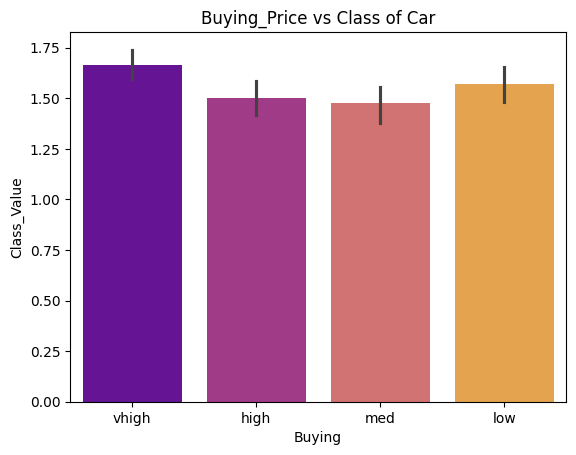

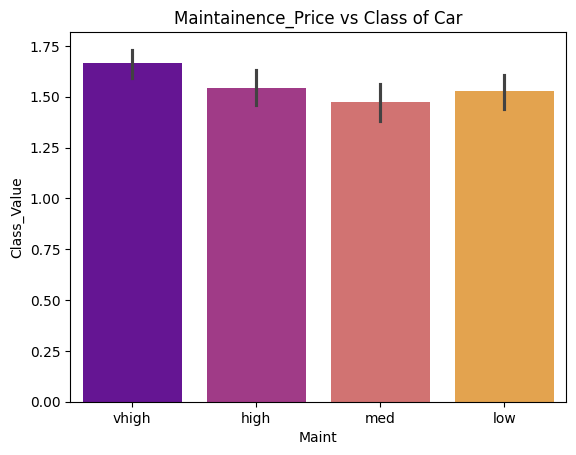

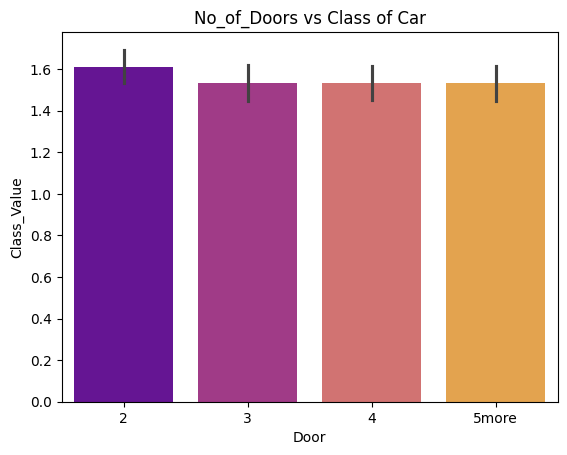

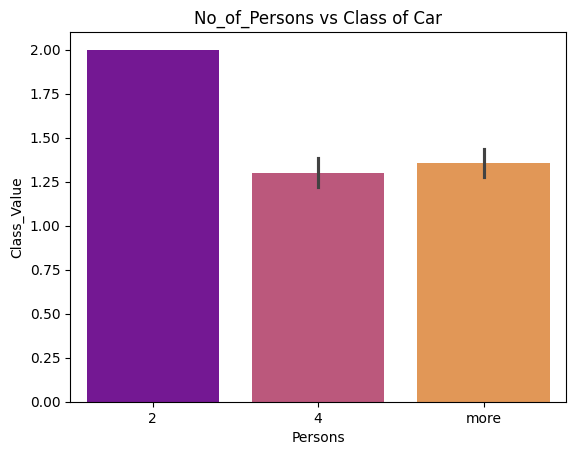

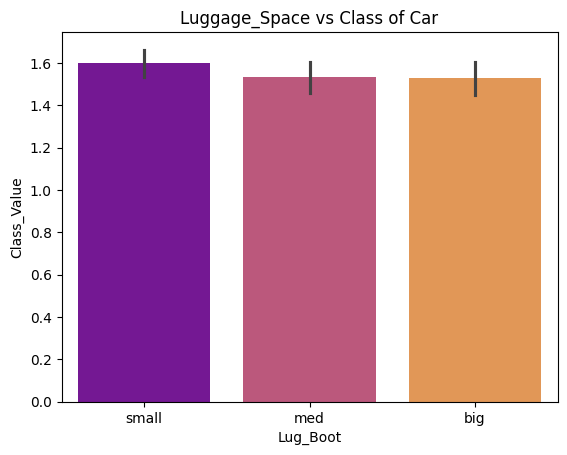

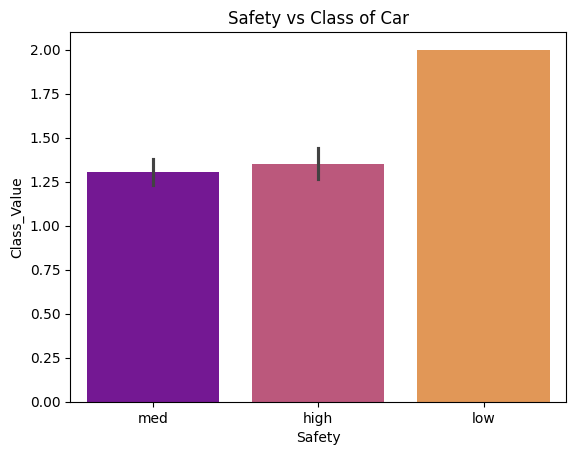

In [14]:
for i in range(len(x_axis_data)):
    plt.figure()
    sns.barplot(x=x_axis_data[i][x_axis_data_label[i]],y=data['Class_Value'],data=data,estimator=np.mean,hue=x_axis_data[i][x_axis_data_label[i]],palette='plasma')
    plt.title(f"{x_axis_data_label[i]} vs Class of Car")

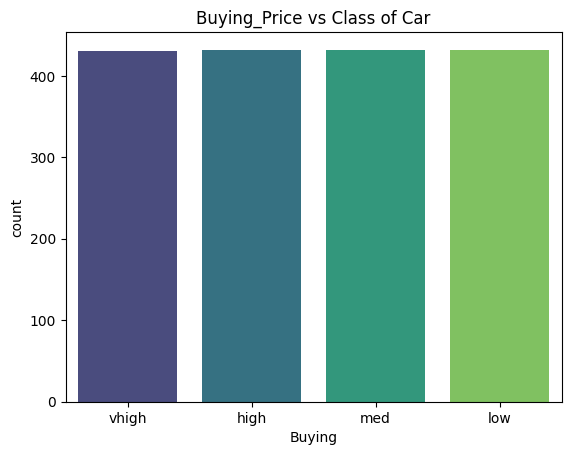

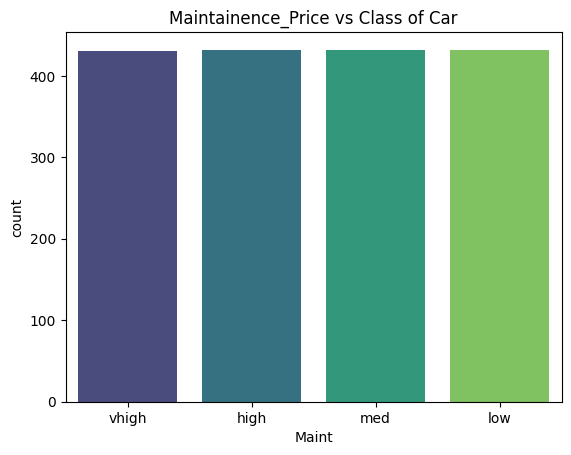

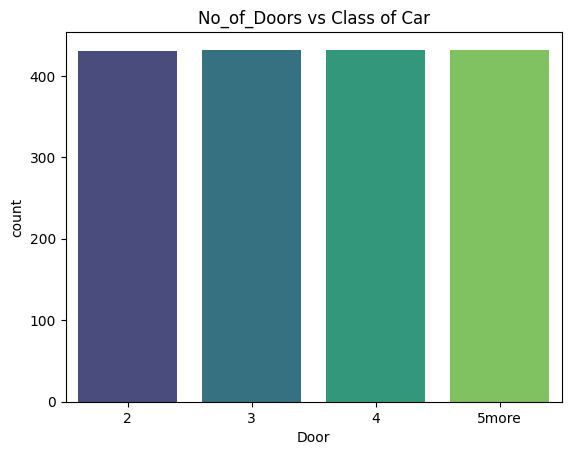

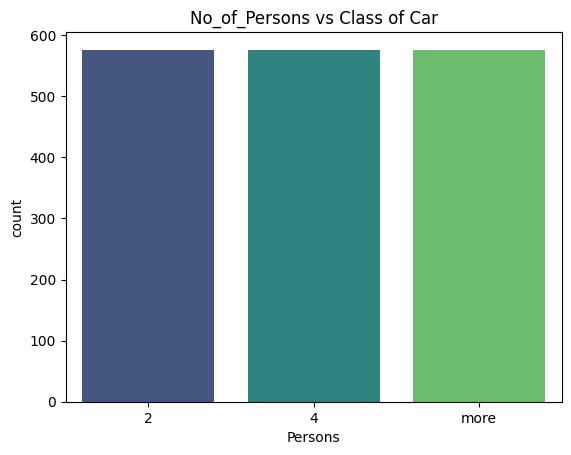

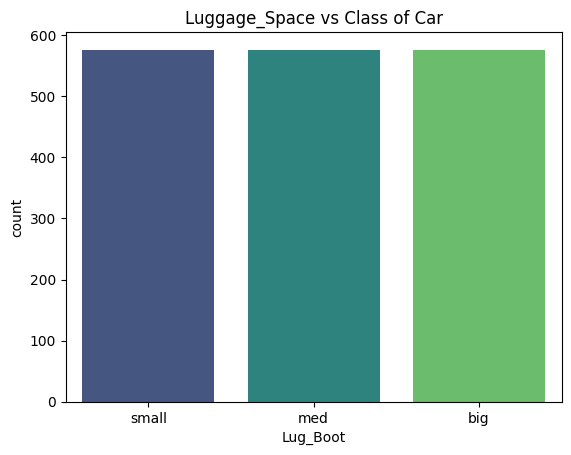

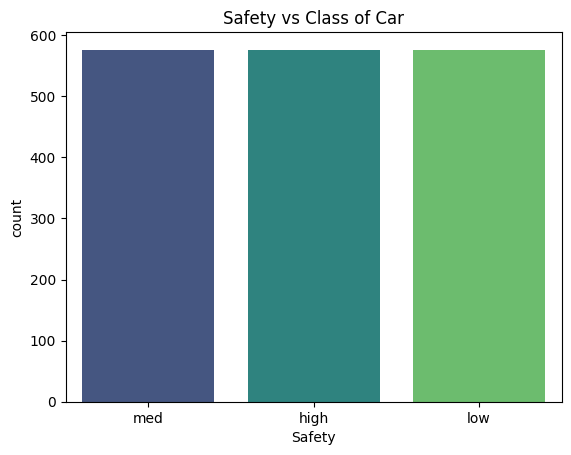

In [15]:
for i in range(len(x_axis_data)):
    plt.figure()
    sns.countplot(x=x_axis_data[i][x_axis_data_label[i]],data=data,hue=x_axis_data[i][x_axis_data_label[i]],palette='viridis')
    plt.title(f"{x_axis_data_label[i]} vs Class of Car")

In [16]:
X=list(zip(buying,maint,door,persons,lug_boot,safety))

In [17]:
Y=list(cls)

In [18]:
print(Y)

[np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2)

In [19]:
X_train,X_test,Y_train,Y_test=sklearn.model_selection.train_test_split(X,Y,test_size=0.1)

In [20]:
print(X_train,Y_train)

[(np.int64(3), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(2)), (np.int64(2), np.int64(0), np.int64(3), np.int64(2), np.int64(2), np.int64(0)), (np.int64(2), np.int64(1), np.int64(2), np.int64(2), np.int64(1), np.int64(2)), (np.int64(1), np.int64(3), np.int64(3), np.int64(0), np.int64(1), np.int64(1)), (np.int64(0), np.int64(3), np.int64(2), np.int64(2), np.int64(1), np.int64(2)), (np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(2)), (np.int64(0), np.int64(0), np.int64(3), np.int64(0), np.int64(0), np.int64(2)), (np.int64(0), np.int64(3), np.int64(3), np.int64(0), np.int64(1), np.int64(2)), (np.int64(0), np.int64(2), np.int64(2), np.int64(1), np.int64(0), np.int64(2)), (np.int64(2), np.int64(0), np.int64(3), np.int64(1), np.int64(0), np.int64(1)), (np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0)), (np.int64(3), np.int64(1), np.int64(3), np.int64(0), np.int64(1), np.int64(1)), (np.int64(0), np.int64(1), np.int64(3),

In [21]:
selected_n=1
acc_score=0
for i in range(1,100,2):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,Y_train)
    score=model.score(X_test,Y_test)

    if(score>acc_score):
        selected_n=i
        acc_score=score

In [22]:
print(selected_n)

9


In [23]:
model=KNeighborsClassifier(n_neighbors=selected_n)

In [24]:
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=9)

In [25]:
predicted=model.predict(X_test)

In [26]:
classes=le.classes_

In [27]:
accuracy=model.score(X_test,Y_test)

In [28]:
print(accuracy)

0.9364161849710982


In [29]:
for i in range(len(predicted)):
    print("Data: "+str(X_test[i]))
    print("Predicted class: "+classes[predicted[i]]+"  Actual class: "+classes[Y_test[i]])

Data: (np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1))
Predicted class: unacc  Actual class: unacc
Data: (np.int64(2), np.int64(2), np.int64(2), np.int64(0), np.int64(2), np.int64(2))
Predicted class: unacc  Actual class: unacc
Data: (np.int64(3), np.int64(2), np.int64(0), np.int64(0), np.int64(1), np.int64(1))
Predicted class: unacc  Actual class: unacc
Data: (np.int64(1), np.int64(1), np.int64(2), np.int64(0), np.int64(0), np.int64(1))
Predicted class: unacc  Actual class: unacc
Data: (np.int64(3), np.int64(1), np.int64(3), np.int64(2), np.int64(1), np.int64(0))
Predicted class: acc  Actual class: acc
Data: (np.int64(0), np.int64(0), np.int64(3), np.int64(1), np.int64(2), np.int64(1))
Predicted class: unacc  Actual class: unacc
Data: (np.int64(0), np.int64(2), np.int64(1), np.int64(0), np.int64(1), np.int64(2))
Predicted class: unacc  Actual class: unacc
Data: (np.int64(1), np.int64(1), np.int64(2), np.int64(2), np.int64(1), np.int64(1))
Predicted class:

In [30]:
label_index=le.classes_

In [39]:
buy_price=input("Enter buying price of your car: "+str(label1))
maintain_price=input("Enter maintainence price of your car: "+str(label2))
doors=input("How many doors are there? "+str(label3))
peeps=input("How many people can sit in your car? "+str(label4))
lug=input("How much is the luggage space? "+str(label5))
safe=input("How safe is your car? "+str(label6))

Enter buying price of your car: ['high' 'low' 'med' 'vhigh'] vhigh
Enter maintainence price of your car: ['high' 'low' 'med' 'vhigh'] vhigh
How many doors are there? ['2' '3' '4' '5more'] 2
How many people can sit in your car? ['2' '4' 'more'] 2
How much is the luggage space? ['big' 'med' 'small'] med
How safe is your car? ['high' 'low' 'med'] low


In [40]:
sample=[]
temp=[]
for i in range(len(label1)):
    if buy_price==label1[i]:
        sample.append(i)
        break
for i in range(len(label2)):
    if maintain_price==label2[i]:
        sample.append(i)
        break
for i in range(len(label3)):
    if doors==label3[i]:
        sample.append(i)
        break
for i in range(len(label4)):
    if peeps==label4[i]:
        sample.append(i)
        break
for i in range(len(label5)):
    if lug==label5[i]:
        sample.append(i)
        break
for i in range(len(label6)):
    if safe==label6[i]:
        sample.append(i)
        break

temp.append(sample)

predicted_answer=model.predict(temp)
print("Predicted class: "+str(predicted_answer))
print("Was your car a good purchase: "+label_index[predicted_answer[0

Predicted class: [2]
